In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set()
figure(figsize=(8, 8), dpi=200)


<Figure size 1600x1600 with 0 Axes>

<Figure size 1600x1600 with 0 Axes>

### Fetching the Dataset

In [146]:
df=pd.read_csv('../input/cipla-hackerrank-1/train.csv',index_col='Customer ID')
df.head()

,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
Customer ID,,,,,,,,,,,,,,,,,,,,,
C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [147]:
df.corr()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
Age,1.000000,-0.010201,-0.010450,-0.023684,-0.083454,0.129760,0.003573,-0.012358,-0.010341,0.002196,0.000632,-0.009819,0.008112
Income (USD),-0.010201,1.000000,0.050371,0.055080,0.005170,0.012911,-0.002141,-0.008139,1.000000,0.009733,0.000469,0.050679,0.038157
Loan Amount Request (USD),-0.010450,0.050371,1.000000,0.682248,0.040952,0.178260,0.000088,-0.008426,0.049976,0.003802,0.001864,0.948350,0.726408
Current Loan Expenses (USD),-0.023684,0.055080,0.682248,1.000000,0.045300,0.114950,0.002767,-0.014519,0.054682,0.014812,0.002130,0.648636,0.485070
Dependents,-0.083454,0.005170,0.040952,0.045300,1.000000,-0.090271,0.009108,0.002471,0.005082,-0.009303,0.002796,0.037302,0.009088
Credit Score,0.129760,0.012911,0.178260,0.114950,-0.090271,1.000000,0.006647,-0.006062,0.012959,0.009116,0.009611,0.170829,0.369450
No. of Defaults,0.003573,-0.002141,0.000088,0.002767,0.009108,0.006647,1.000000,-0.001282,-0.002093,0.000477,-0.008191,0.001718,-0.004330
Property ID,-0.012358,-0.008139,-0.008426,-0.014519,0.002471,-0.006062,-0.001282,1.000000,-0.008075,0.008658,0.008151,-0.011890,-0.009751
Property Age,-0.010341,1.000000,0.049976,0.054682,0.005082,0.012959,-0.002093,-0.008075,1.000000,0.009798,0.000472,0.050306,0.037796
Property Type,0.002196,0.009733,0.003802,0.014812,-0.009303,0.009116,0.000477,0.008658,0.009798,1.000000,-0.001105,0.003279,0.001984


### Columns

In [148]:
df.columns

Index(['Name', 'Gender', 'Age', 'Income (USD)', 'Income Stability',
       'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

### Name columns is not necessary 

In [149]:
df.drop(['Name','Type of Employment','Property ID','Property Age','Property Type','Property Location','Expense Type 1','Expense Type 2'],axis=1,inplace=True)

### Data Dimension

In [150]:
df.shape

(30000, 15)

### Data Description

In [151]:
df.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,1.000000,1.077967e+06,481907.320000


#### Chcking the null values

In [152]:
df.isnull().sum()

Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [153]:
# sns.heatmap(df.corr(),cmap='RdYlGn',annot=True)

#### Dropping Null values wherever possible

In [154]:
df.dropna(subset=['Gender','Income Stability','Current Loan Expenses (USD)','Loan Sanction Amount (USD)'],inplace=True)

#### Checking the Null values in df columns

In [155]:
df.isnull().sum()

Gender                            0
Age                               0
Income (USD)                   4004
Income Stability                  0
Profession                        0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Dependents                     2168
Credit Score                   1502
No. of Defaults                   0
Has Active Credit Card         1464
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)        0
dtype: int64

### Univariate Analysis

### Gender

In [156]:
df.Gender.unique()

array(['F', 'M'], dtype=object)

## Age Column Analysis

In [157]:
df.Age.unique()

array([56, 32, 65, 31, 60, 43, 45, 38, 18, 39, 48, 61, 54, 64, 41, 19, 44,
       24, 55, 63, 23, 29, 28, 49, 30, 37, 51, 27, 59, 62, 21, 33, 58, 25,
       26, 50, 46, 22, 36, 53, 34, 40, 35, 42, 57, 47, 52, 20])

In [158]:
df.Age.isnull().sum()

0

#### Cehcking the skewness of the distribution

In [159]:
df.Age.skew()

0.04800308123537974

### Boxplot for checking outliers

<AxesSubplot:xlabel='Age'>

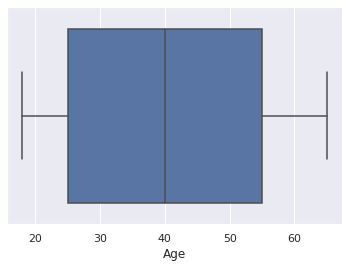

In [160]:
sns.boxplot((df.Age))

### There is no outlier in age 

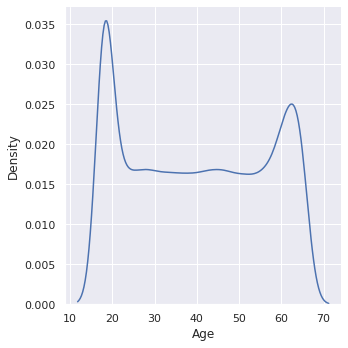

In [161]:
sns.displot((df.Age),kind='kde')

In [162]:
df.Age.skew()

0.04800308123537974

### Income

In [163]:
df['Income (USD)'].isnull().sum()

4004

In [164]:
np.mean(df['Income (USD)'])

2640.2814519788253

#### Fillinf the null values with mean values

In [165]:
df['Income (USD)'][df['Income (USD)'].isna()]=np.mean(df['Income (USD)'])


#### Counting the Null values for that column

In [166]:
df['Income (USD)'].isnull().sum()

0

####  Sorting USD income

In [167]:
sorted(df['Income (USD)'],reverse=False)

[377.7,
 378.76,
 378.91,
 418.9,
 424.45,
 437.63,
 438.44,
 442.47,
 450.16,
 459.76,
 487.81,
 495.7,
 495.91,
 499.33,
 500.3,
 505.2,
 505.32,
 505.63,
 508.99,
 512.12,
 516.85,
 518.15,
 518.29,
 521.11,
 522.47,
 525.37,
 526.16,
 538.33,
 540.89,
 542.06,
 543.45,
 546.32,
 550.22,
 552.94,
 553.6,
 558.74,
 559.17,
 564.24,
 564.36,
 566.11,
 569.53,
 570.12,
 572.83,
 572.91,
 577.17,
 577.23,
 580.27,
 583.94,
 586.78,
 588.32,
 591.24,
 592.18,
 601.66,
 604.5,
 605.4,
 606.21,
 607.1,
 609.17,
 609.62,
 610.15,
 611.25,
 611.35,
 612.97,
 613.81,
 615.95,
 616.78,
 619.61,
 620.37,
 621.04,
 622.09,
 622.97,
 623.41,
 625.57,
 625.98,
 627.09,
 628.66,
 629.37,
 630.91,
 631.52,
 632.45,
 632.55,
 632.82,
 633.78,
 634.87,
 638.88,
 639.26,
 639.83,
 640.12,
 640.32,
 641.26,
 641.86,
 642.3,
 642.48,
 642.98,
 643.26,
 643.55,
 643.59,
 644.27,
 644.5,
 644.56,
 644.91,
 646.2,
 647.75,
 648.55,
 648.76,
 648.81,
 651.08,
 652.06,
 653.27,
 653.36,
 653.98,
 656.58,
 656

In [168]:
df.drop(df[(df['Income (USD)'] > 50000 ) | (df['Income (USD)'] < 500)].index , inplace = True)

<AxesSubplot:xlabel='Income (USD)'>

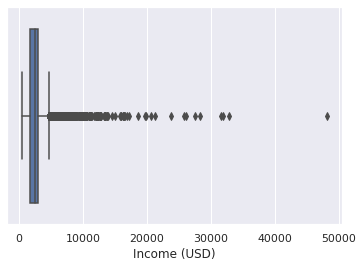

In [169]:
sns.boxplot((df['Income (USD)']))

In [170]:
sorted(df['Income (USD)'],reverse=True)

[48095.16,
 32726.98,
 31866.97,
 31584.05,
 28331.74,
 27518.64,
 26049.85,
 25828.61,
 23767.31,
 21191.32,
 20667.81,
 19768.89,
 19726.92,
 18582.04,
 17162.8,
 16779.62,
 16553.11,
 16445.89,
 16364.99,
 16278.95,
 16180.5,
 15974.48,
 15966.99,
 15694.12,
 14923.86,
 14561.47,
 13890.26,
 13798.01,
 13676.52,
 13646.44,
 13490.98,
 13469.3,
 13431.81,
 13281.07,
 13199.03,
 12861.16,
 12775.23,
 12702.65,
 12647.69,
 12602.72,
 12598.8,
 12586.95,
 12574.7,
 12398.65,
 12383.55,
 12354.96,
 12299.88,
 12185.67,
 12159.73,
 12120.85,
 12095.54,
 12070.57,
 12045.22,
 11972.21,
 11847.07,
 11763.52,
 11308.31,
 11244.85,
 11172.16,
 11158.7,
 11029.19,
 11027.01,
 11025.63,
 11012.09,
 10998.59,
 10971.49,
 10855.95,
 10843.02,
 10624.78,
 10579.38,
 10565.44,
 10551.35,
 10539.48,
 10538.88,
 10522.61,
 10518.81,
 10483.98,
 10474.05,
 10461.33,
 10397.48,
 10355.96,
 10338.19,
 10300.31,
 10290.09,
 10261.82,
 10255.43,
 10250.59,
 10233.55,
 10208.42,
 10189.2,
 10186.39,
 10177

#### Log Transformation forthe income 

In [171]:
df['Income (USD)']=np.log(df['Income (USD)'])

In [172]:
df['Income (USD)'].skew()

0.1365780169650817

In [173]:
def bxcx(px,col):
    data = px[col].values
    px[col], fitted_lambda= scipy.stats.boxcox(data[data > 0])
    sns.boxplot(x=col,data=px)

In [174]:
def mi(px,col):
    q1 = px[col].quantile(0.25)
    q3 = px[col].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    med=np.median(px[col])
    for i in px[col]:
        if(i>Upper_tail or i<Lower_tail):
            px[col] = df[col].replace(i, med)

### Loan amount request

### <span style='color:red'> Boxcox transformation for loan amount requested

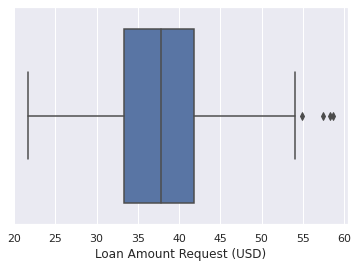

In [175]:
bxcx(df,'Loan Amount Request (USD)')

#### Dropping threshold 53

In [176]:
df.drop(df[(df['Loan Amount Request (USD)'] > 53 )].index , inplace = True)

<AxesSubplot:xlabel='Loan Amount Request (USD)'>

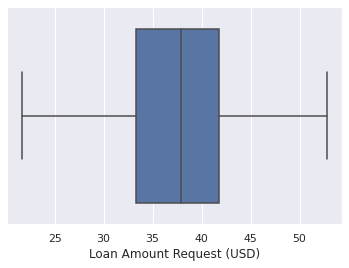

In [177]:
sns.boxplot(df['Loan Amount Request (USD)'])

<AxesSubplot:xlabel='Loan Amount Request (USD)', ylabel='Density'>

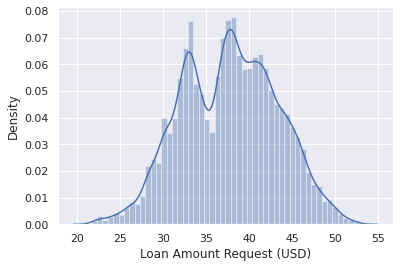

In [178]:
sns.distplot(df['Loan Amount Request (USD)'])

#### Current Loan Expenses (USD)

In [179]:
# sorted(df['Current Loan Expenses (USD)'],reverse=True)

In [180]:
df['Current Loan Expenses (USD)'][df['Current Loan Expenses (USD)'] < 0]

Customer ID
C-12417   -999.0
C-22652   -999.0
C-9148    -999.0
C-26492   -999.0
C-25032   -999.0
           ...  
C-5536    -999.0
C-25751   -999.0
C-7089    -999.0
C-8734    -999.0
C-26400   -999.0
Name: Current Loan Expenses (USD), Length: 161, dtype: float64

In [181]:
df.drop(df[(df['Current Loan Expenses (USD)'] < 0 )].index , inplace = True)

#### Median Imputation to remove outliers

In [182]:
# mi(df,'Current Loan Expenses (USD)')

#### Max no in Current loan expenses

In [183]:
max(df['Current Loan Expenses (USD)'])

3419.66

#### Boxplot for cle

<AxesSubplot:xlabel='Current Loan Expenses (USD)'>

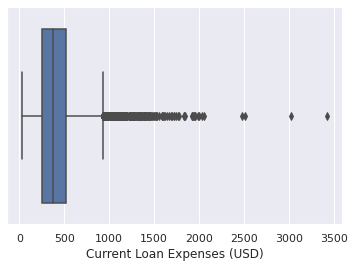

In [184]:
sns.boxplot(df['Current Loan Expenses (USD)'])

<AxesSubplot:xlabel='Current Loan Expenses (USD)'>

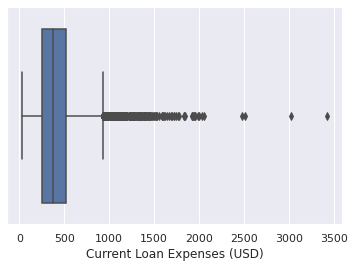

In [185]:
sns.boxplot(df['Current Loan Expenses (USD)'])

#### <span style='color:red'> Boxcox transfroamtion

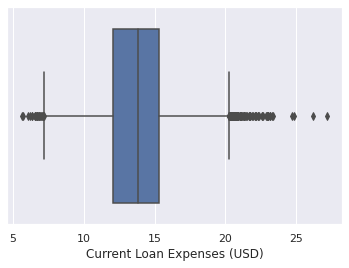

In [186]:
bxcx(df,'Current Loan Expenses (USD)')

In [187]:
df.drop(df[(df['Current Loan Expenses (USD)'] < 10 )].index , inplace = True)

<AxesSubplot:xlabel='Current Loan Expenses (USD)'>

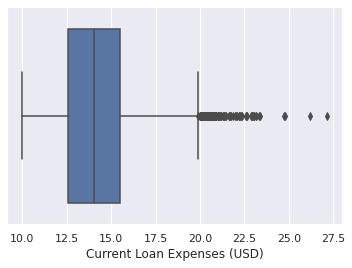

In [188]:
sns.boxplot((df['Current Loan Expenses (USD)'][df['Current Loan Expenses (USD)']>10]))

In [189]:
df['Current Loan Expenses (USD)'][df['Current Loan Expenses (USD)']>10].skew()

0.3199705477429335

#### <span style='color:red'> Current Loan Expenses (USD) transform

<AxesSubplot:xlabel='Current Loan Expenses (USD)', ylabel='Density'>

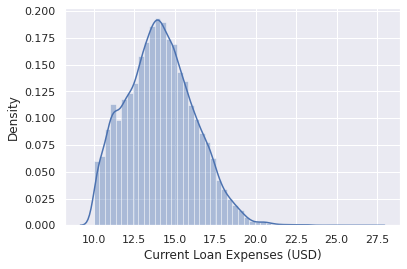

In [190]:
sns.distplot((df['Current Loan Expenses (USD)']))

#### Dependents

In [191]:
df['Dependents'].unique()

array([ 3.,  1.,  2., nan,  4.,  5.,  8.,  6.,  7., 10., 14.])

In [192]:
df['Dependents'].isnull().sum()

1966

In [193]:
df['Dependents'].skew()

0.8207999911558672

### Removing Null values

In [194]:
df['Dependents'][df['Dependents'].isna()]=np.mean(df['Dependents'])

#### <span style='color:red'> Boxcox Normalization</span>

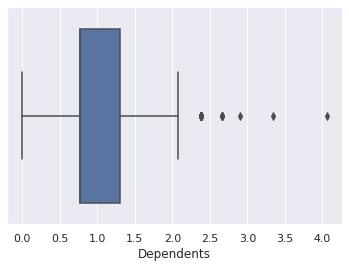

In [195]:
bxcx(df,'Dependents')

#### Filtering out


In [196]:
df.drop(df[(df['Dependents'] > 2.3 )].index , inplace = True)

### clean boxplot

<AxesSubplot:xlabel='Dependents'>

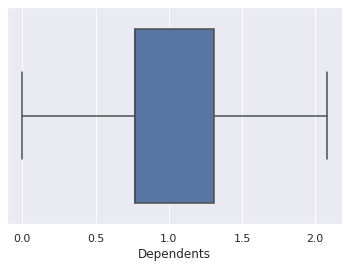

In [197]:
sns.boxplot(df['Dependents'])

### Credit score

In [198]:
df['Credit Score'].isnull().sum()

1358

### Mean Imputation

In [199]:
df['Credit Score'][df['Credit Score'].isna()]=np.mean(df['Credit Score'])

In [200]:
df.drop(df[(df['Dependents'] > 2.3 )].index , inplace = True)

In [201]:
df.drop(df[(df['Credit Score'].isna()) & (df['Property Price'] <= 0 )].index,inplace=True)

<AxesSubplot:xlabel='Credit Score'>

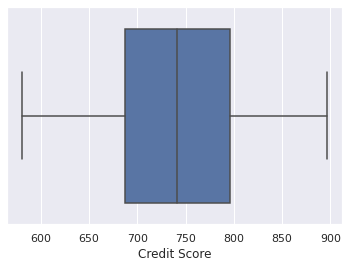

In [202]:
sns.boxplot(df['Credit Score'])

<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

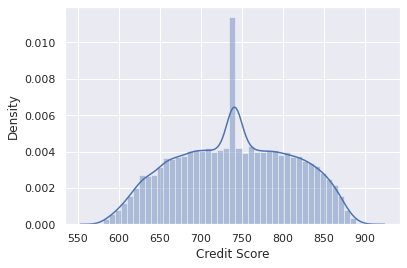

In [203]:
sns.distplot(df['Credit Score'])

### No. of Defaults

In [204]:
df['No. of Defaults'].unique()

array([0, 1])

In [205]:
df['No. of Defaults'].head()

Customer ID
C-36995    0
C-33999    0
C-3770     0
C-26480    1
C-23459    1
Name: No. of Defaults, dtype: int64

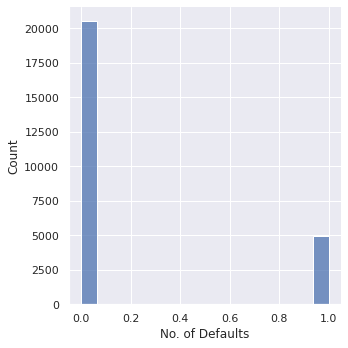

In [206]:
sns.displot(df['No. of Defaults'])

### Co-Applicant

In [207]:
df['Co-Applicant'].unique()

array([   1,    0, -999])

#### It consists -999 is need to be removed.

In [208]:
df.drop(df[(df['Co-Applicant'] < 0 )].index , inplace = True)

#### Property Price	

In [209]:
df.drop(df[(df['Property Price'] < 0 )].index , inplace = True)

In [210]:
df['Property Price'].unique()

array([119933.46,  54791.  ,  72440.58, ..., 102108.02, 168194.47,
       194512.6 ])

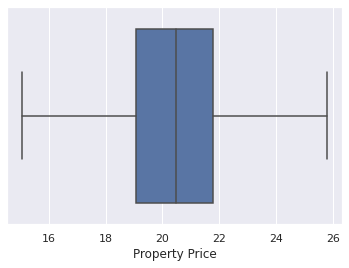

In [211]:
bxcx(df,'Property Price')

#### Loan Sanction Amount (USD)

In [212]:
df['Loan Sanction Amount (USD)'].isnull().sum()

0

In [213]:
df['Loan Sanction Amount (USD)'][(df['Loan Sanction Amount (USD)']==0)]=np.median(df['Loan Sanction Amount (USD)'])

<AxesSubplot:xlabel='Loan Sanction Amount (USD)', ylabel='Density'>

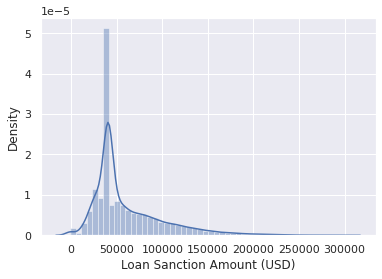

In [214]:
sns.distplot(df['Loan Sanction Amount (USD)'])

In [215]:
np.log(df['Loan Sanction Amount (USD)']).skew()

0.2726809306650201

<AxesSubplot:xlabel='Loan Sanction Amount (USD)'>

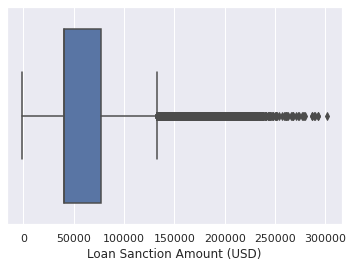

In [216]:
sns.boxplot(df['Loan Sanction Amount (USD)'])

In [217]:
df.drop(df[(df['Loan Sanction Amount (USD)'] < 0 )].index , inplace = True)

In [218]:
(df['Loan Sanction Amount (USD)']).skew()

1.714533206729043

In [219]:
mi(df,'Loan Sanction Amount (USD)')

<AxesSubplot:xlabel='Loan Sanction Amount (USD)'>

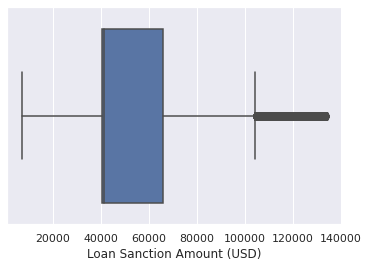

In [220]:
sns.boxplot(df['Loan Sanction Amount (USD)'])

#### 

#### Categorical Data Analysis

In [221]:
df.columns

Index(['Gender', 'Age', 'Income (USD)', 'Income Stability', 'Profession',
       'Location', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Dependents', 'Credit Score', 'No. of Defaults',
       'Has Active Credit Card', 'Co-Applicant', 'Property Price',
       'Loan Sanction Amount (USD)'],
      dtype='object')

In [222]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [223]:
df['Income Stability'].unique()

array(['Low', 'High'], dtype=object)

In [224]:
df['Profession'].unique()

array(['Working', 'Pensioner', 'State servant', 'Commercial associate',
       'Unemployed', 'Businessman', 'Maternity leave'], dtype=object)

In [225]:
df['Profession'][(df['Profession']!='Unemployed')]='Working'

In [226]:
df['Profession'].unique()

array(['Working', 'Unemployed'], dtype=object)

In [227]:
df['Location'].unique()

array(['Semi-Urban', 'Rural', 'Urban'], dtype=object)

In [228]:
df['Has Active Credit Card'][(df['Has Active Credit Card'].isna()) | (df['Has Active Credit Card']=='Inactive') | (df['Has Active Credit Card']=='Unpossessed')]='No'

In [229]:
df['Has Active Credit Card'].unique()

array(['No', 'Active'], dtype=object)

In [230]:
df=pd.get_dummies(df,columns=['Gender','Income Stability','Profession','Location','Has Active Credit Card'],drop_first=True,dtype=int)

In [231]:
df.dtypes

Age                              int64
Income (USD)                   float64
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Co-Applicant                     int64
Property Price                 float64
Loan Sanction Amount (USD)     float64
Gender_M                         int64
Income Stability_Low             int64
Profession_Working               int64
Location_Semi-Urban              int64
Location_Urban                   int64
Has Active Credit Card_No        int64
dtype: object

In [232]:
data=df.copy()

In [233]:
first_column = data.pop('Loan Sanction Amount (USD)')
data.insert(15,'Loan Sanction Amount (USD)', first_column)

In [234]:
data.head()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Co-Applicant,Property Price,Gender_M,Income Stability_Low,Profession_Working,Location_Semi-Urban,Location_Urban,Has Active Credit Card_No,Loan Sanction Amount (USD)
Customer ID,,,,,,,,,,,,,,,,
C-36995,56,7.566854,37.609830,11.913613,1.305730,809.44,0,1,20.496312,0,1,1,1,0,1,54607.18
C-33999,32,8.507731,34.231603,15.097679,0.000000,780.40,0,1,18.367871,1,1,1,1,0,1,37469.98
C-3770,65,6.895875,34.034212,10.610488,0.000000,833.15,0,0,19.109687,0,0,1,1,0,1,36474.43
C-26480,65,7.878641,38.373386,12.797613,0.772104,832.70,1,1,20.531470,0,0,1,0,0,1,56040.54
C-23459,31,7.868931,41.327588,15.054653,0.927938,745.55,1,1,22.090991,0,1,1,1,0,0,74008.28


In [235]:
data=data.head(10000)

### Features and Targets

In [236]:
inputs=data.iloc[:,:15]
target=data.iloc[:,15:]

In [237]:
inputs.head(1)

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Co-Applicant,Property Price,Gender_M,Income Stability_Low,Profession_Working,Location_Semi-Urban,Location_Urban,Has Active Credit Card_No
Customer ID,,,,,,,,,,,,,,,
C-36995,56,7.566854,37.60983,11.913613,1.30573,809.44,0,1,20.496312,0,1,1,1,0,1


#### Initializing the Parameters for XGboost

In [238]:
params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}

#### Import Randomizedsearcv and xgboost

In [239]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

#### Creating the Classifier/Model

In [240]:
classifier=xgboost.XGBClassifier()

In [241]:
data.dtypes

Age                              int64
Income (USD)                   float64
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Co-Applicant                     int64
Property Price                 float64
Gender_M                         int64
Income Stability_Low             int64
Profession_Working               int64
Location_Semi-Urban              int64
Location_Urban                   int64
Has Active Credit Card_No        int64
Loan Sanction Amount (USD)     float64
dtype: object

In [242]:
data.shape

(10000, 16)

In [243]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.33, random_state=42)

In [244]:
data.isnull().sum()

Age                            0
Income (USD)                   0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Co-Applicant                   0
Property Price                 0
Gender_M                       0
Income Stability_Low           0
Profession_Working             0
Location_Semi-Urban            0
Location_Urban                 0
Has Active Credit Card_No      0
Loan Sanction Amount (USD)     0
dtype: int64

###### from sklearn.linear_model import LinearRegression


In [245]:
from sklearn.linear_model import LinearRegression


In [246]:
model=LinearRegression()


In [247]:
model.fit(x_train,y_train)


LinearRegression()

In [248]:
target.head(1)

,Loan Sanction Amount (USD)
Customer ID,
C-36995,54607.18


In [249]:
model.predict([[56,7.566854,37.60983,22.527152,1.304202,809.44,0,1,37.153128,0,1,1,1,0,1]])

array([[84416.33572786]])

In [250]:
params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}

In [251]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE


In [252]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
  
# Fitting the model
xgb_r.fit(x_train, y_train)

[06:49:27] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=2, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [253]:
pred = xgb_r.predict(x_test)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  13254.620667


### R2 score

In [254]:
from sklearn.metrics import r2_score
k=r2_score(y_test,pred)
k

0.7593597313744489

In [255]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgb_r,x_test,y_test,cv=10)

[06:49:27] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[06:49:28] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[06:49:28] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[06:49:28] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[06:49:28] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[06:49:28] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[06:49:28] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[06:49:28] WARNING: ../src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[06:49:28] WARNING: ../src/objective/regression_

In [256]:
np.mean(score)

0.7354469883686818

### Importing the test case

In [257]:
test=pd.read_csv('../input/cipla-hackerrank-1/test.csv',index_col='Customer ID')
test.head()

,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
Customer ID,,,,,,,,,,,,,,,,,,,,,
C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,396.72,...,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,463.76,...,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,493.15,...,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,446.15,...,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,370.10,...,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.0


In [258]:
test.dtypes

Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                    object
Property Price                  object
dtype: object

In [259]:
test.columns

Index(['Name', 'Gender', 'Age', 'Income (USD)', 'Income Stability',
       'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price'],
      dtype='object')

In [260]:
test.drop(['Name','Type of Employment','Property ID','Property Age','Property Type','Property Location','Expense Type 1','Expense Type 2'],axis=1,inplace=True)

In [261]:
test.isnull().sum()

Gender                           31
Age                               0
Income (USD)                    750
Income Stability                813
Profession                        0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Co-Applicant                      0
Property Price                    0
dtype: int64

In [262]:
test.drop(test[(test['Co-Applicant'] == '?' )].index , inplace = True)

In [263]:
test['Co-Applicant'][test['Co-Applicant'] == '1']=1
test['Co-Applicant'][test['Co-Applicant'] == '0']=0

In [264]:
test.drop(test[(test['Property Price'] == '?' )].index , inplace = True)

In [265]:
test['Property Price']=pd.to_numeric(test['Property Price'], downcast='float')

In [266]:
test['Co-Applicant'].unique()

array([1, 0], dtype=object)

In [267]:
test.dropna(axis=0,inplace=True)

In [268]:
test['Income (USD)']=np.log(test['Income (USD)'])


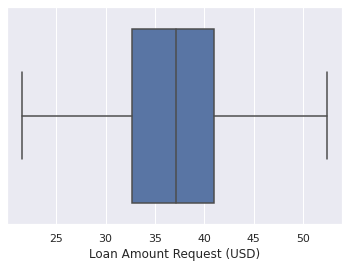

In [269]:
bxcx(test,'Loan Amount Request (USD)')


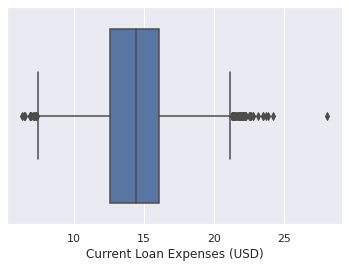

In [270]:
bxcx(test,'Current Loan Expenses (USD)')


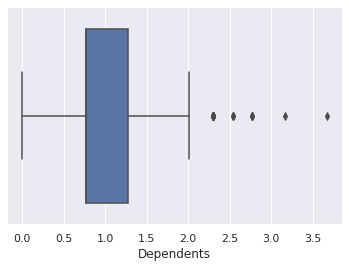

In [271]:
bxcx(test,'Dependents')

In [272]:
test['Profession'][(test['Profession']!='Unemployed')]='Working'


In [273]:
test['Has Active Credit Card'][(test['Has Active Credit Card'].isna()) | (test['Has Active Credit Card']=='Inactive') | (test['Has Active Credit Card']=='Unpossessed')]='No'


In [274]:
test=pd.get_dummies(test,columns=['Gender','Income Stability','Profession','Location','Has Active Credit Card'],drop_first=True,dtype=int)

In [275]:
inputs.columns

Index(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Co-Applicant', 'Property Price', 'Gender_M',
       'Income Stability_Low', 'Profession_Working', 'Location_Semi-Urban',
       'Location_Urban', 'Has Active Credit Card_No'],
      dtype='object')

In [276]:
test[['Property Price', 'Co-Applicant']] = test[['Property Price', 'Co-Applicant']].astype(float)


In [277]:
test.dtypes

Age                              int64
Income (USD)                   float64
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Co-Applicant                   float64
Property Price                 float64
Gender_M                         int64
Income Stability_Low             int64
Profession_Working               int64
Location_Semi-Urban              int64
Location_Urban                   int64
Has Active Credit Card_No        int64
dtype: object

In [278]:
test.columns

Index(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Co-Applicant', 'Property Price', 'Gender_M',
       'Income Stability_Low', 'Profession_Working', 'Location_Semi-Urban',
       'Location_Urban', 'Has Active Credit Card_No'],
      dtype='object')

In [279]:
# Predict the model
pred = xgb_r.predict(test)
  



In [280]:
pred

array([87206.945, 61585.668, 44044.688, ..., 38529.543, 62859.46 ,
       61868.6  ], dtype=float32)

In [281]:
k=pd.DataFrame(pred)

In [282]:
p=pd.DataFrame(test.index)


In [283]:
k['customer id']=p

In [284]:
k.set_index('customer id',inplace=True)

In [285]:
k.rename(columns={0:"loan to give"})

,loan to give
customer id,
C-26247,87206.945312
C-35067,61585.667969
C-34590,44044.687500
C-16668,64199.539062
C-2600,37931.195312
...,...
C-32138,40844.484375
C-9076,92332.421875
C-46479,38529.542969


In [286]:
k.to_csv('./info.csv')